In [67]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

In [68]:
df=pd.read_csv("CHD_preprocessed.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [69]:
column_cont = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
df[column_cont] = df[column_cont].apply(lambda x: x/x.max())
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.557143,1,0,0.000000,0.0,0,0,0,0.325000,0.359322,0.491228,0.474824,0.559441,0.195431,0
1,0,0.657143,0,0,0.000000,0.0,0,0,0,0.416667,0.410169,0.568421,0.505810,0.664336,0.192893,0
2,1,0.685714,0,1,0.285714,0.0,0,0,0,0.408333,0.432203,0.561404,0.446127,0.524476,0.177665,0
3,0,0.871429,1,1,0.428571,0.0,0,1,0,0.375000,0.508475,0.666667,0.503169,0.454545,0.261421,1
4,0,0.657143,1,1,0.328571,0.0,0,0,0,0.475000,0.440678,0.589474,0.406690,0.594406,0.215736,0


In [70]:
train_df = df[:int(len(df)*0.8)]
val_df = df[int(len(df)*0.8):]

In [71]:
class_0 = train_df[train_df['TenYearCHD'] == 0]
class_1 = train_df[train_df['TenYearCHD'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
train_df = pd.concat([class_0, class_1], axis=0)
print('Data in Train:')
print(train_df['TenYearCHD'].value_counts())

Data in Train:
0    2803
1    2803
Name: TenYearCHD, dtype: int64


In [72]:
class_0 = val_df[val_df['TenYearCHD'] == 0]
class_1 = val_df[val_df['TenYearCHD'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
val_df = pd.concat([class_0, class_1], axis=0)
print('Data in Test:')
print(val_df['TenYearCHD'].value_counts())

Data in Test:
0    702
1    702
Name: TenYearCHD, dtype: int64


In [73]:
y_train = train_df.pop('TenYearCHD')
y_test = val_df.pop('TenYearCHD')
X_train = train_df
X_test = val_df
y_train.head()

0    0
1    0
2    0
4    0
5    0
Name: TenYearCHD, dtype: int64

In [74]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=15, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                256       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Sid Kasi\AppData\Roaming\Python\Python310\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [75]:
history=binary_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10)

Epoch 1/50
561/561 [==============================] - 1s 829us/step - loss: 0.6855 - accuracy: 0.5606 - val_loss: 0.6705 - val_accuracy: 0.6346
Epoch 2/50
561/561 [==============================] - 0s 667us/step - loss: 0.6696 - accuracy: 0.6250 - val_loss: 0.6610 - val_accuracy: 0.6282
Epoch 3/50
561/561 [==============================] - 0s 682us/step - loss: 0.6650 - accuracy: 0.6286 - val_loss: 0.6529 - val_accuracy: 0.6289
Epoch 4/50
561/561 [==============================] - 0s 648us/step - loss: 0.6595 - accuracy: 0.6297 - val_loss: 0.6475 - val_accuracy: 0.6581
Epoch 5/50
561/561 [==============================] - 0s 635us/step - loss: 0.6549 - accuracy: 0.6288 - val_loss: 0.6424 - val_accuracy: 0.6353
Epoch 6/50
561/561 [==============================] - 0s 637us/step - loss: 0.6502 - accuracy: 0.6375 - val_loss: 0.6390 - val_accuracy: 0.6425
Epoch 7/50
561/561 [==============================] - 0s 633us/step - loss: 0.6558 - accuracy: 0.6295 - val_loss: 0.6382 - val_accuracy:

In [78]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Framingham neural network')
print(accuracy_score(y_test, binary_pred))
print(classification_report(y_test, binary_pred))

Results for Framingham neural network
0.7094017094017094
              precision    recall  f1-score   support

           0       0.72      0.69      0.70       702
           1       0.70      0.73      0.72       702

    accuracy                           0.71      1404
   macro avg       0.71      0.71      0.71      1404
weighted avg       0.71      0.71      0.71      1404



Results for Framingham neural network


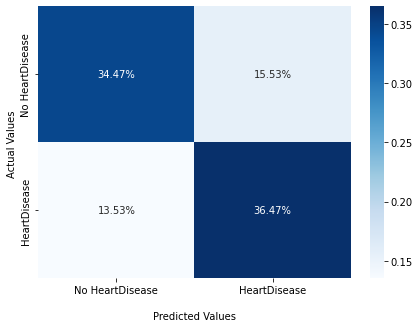

In [79]:
cm = confusion_matrix(y_test, binary_pred)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

print('Results for Framingham neural network')
plt.show()